## Knapsack problem

Comparison of different methods to solve it :
- The bruteforce method
- The pymoo's method
- the greedy method

This notebook covers the same topics as [knapsack.ipynb](knapsack.ipynb) but with much more objects. Which implies that run this notebook can take few hours. 


<br>Creation of random knapsack problem, and pymoo solution from : [pymoo](https://pymoo.org/customization/binary.html)

In [1]:
%load_ext autoreload
%autoreload 2
import knapsack_vk
from pymoo.problems.single.knapsack import create_random_knapsack_problem
import time
import matplotlib.pyplot as plt

The results of the different methods as a fonction of the number of objects :

In [2]:
executions_time = []
for num_objects in range(1, 26):
    problem = create_random_knapsack_problem(num_objects)
    print(f'With {num_objects} items \n')
    print(f"List of weights: {problem.W}\nList of values: {problem.P} \nCapacity of the knapsack: {problem.C}\n")

    start_bf = time.time()
    bf = knapsack_vk.bruteforce(problem)
    print(f'Bruteforce solution: {knapsack_vk.bruteforce(problem)[0]}, {knapsack_vk.bruteforce(problem)[1]}')
    end_bf = time.time()

    start_greedy = time.time()
    print(f'Greedy solution: {knapsack_vk.greedy_algorithm(problem)[0]}, {knapsack_vk.greedy_algorithm(problem)[1]}')
    end_greedy = time.time()

    start_pymoo = time.time()
    res = knapsack_vk.knapsack_pymoo(problem)
    result_pymoo = res.X.astype(int)
    total_value_pymoo = 0
    for i in range(len(result_pymoo)):
        if result_pymoo[i] == 1:
            total_value_pymoo += problem.P[i]
    print(f"Pymoo's solution: {total_value_pymoo}, {result_pymoo}\n")
    end_pymoo = time.time()

    data = {}
    data['num_objects'] = num_objects
    data['greedy'] = end_greedy - start_greedy
    data['pymoo'] = end_pymoo - start_pymoo
    data['bruteforce'] = end_bf - start_bf
    executions_time.append(data)
    
    print(f'Time greedy: {data["greedy"]}')
    print(f'Time pymoo: {data["pymoo"]}')
    print(f'Time bruteforce: {data["bruteforce"]}\n\n')

With 1 items 

List of weights: [13]
List of values: [38] 
Capacity of the knapsack: 1

Bruteforce solution: 0, [0]
Greedy solution: 0, [0]
Pymoo's solution: 0, [0]

Time greedy: 1.6927719116210938e-05
Time pymoo: 0.7359273433685303
Time bruteforce: 0.00034809112548828125


With 2 items 

List of weights: [73 10]
List of values: [38 13] 
Capacity of the knapsack: 8

Bruteforce solution: 0, [0]
Greedy solution: 0, [0, 0]
Pymoo's solution: 0, [0 0]

Time greedy: 1.8835067749023438e-05
Time pymoo: 0.6137852668762207
Time bruteforce: 0.0006289482116699219


With 3 items 

List of weights: [10 76  6]
List of values: [38 13 73] 
Capacity of the knapsack: 9

Bruteforce solution: 73, [0, 0, 1]
Greedy solution: 73, [0, 0, 1]
Pymoo's solution: 73, [0 0 1]

Time greedy: 2.4318695068359375e-05
Time pymoo: 0.5629472732543945
Time bruteforce: 0.0010492801666259766


With 4 items 

List of weights: [76  6 80 65]
List of values: [38 13 73 10] 
Capacity of the knapsack: 22

Bruteforce solution: 13, [0,

Bruteforce solution: 271, [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0]
Greedy solution: 271, [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0]
Pymoo's solution: 271, [1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0]

Time greedy: 8.416175842285156e-05
Time pymoo: 2.345855712890625
Time bruteforce: 175.82476258277893


With 22 items 

List of weights: [51 69 88 88 95 97 87 14 10  8 64 62 23 58  2  1 61 82  9 89 14 48]
List of values: [38 13 73 10 76  6 80 65 17  2 77 72  7 26 51 21 19 85 12 29 30 15] 
Capacity of the knapsack: 112

Bruteforce solution: 268, [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
Greedy solution: 268, [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
Pymoo's solution: 268, [0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0]

Time greedy: 7.2479248046875e-05
Time pymoo: 2.3263487815856934
Time bruteforce: 352.09019780158997


With 23 items 

List of weights: [69 88 88 95 97 87 14 10  8 64 62 23 58  2  1 61 

Graphic representation of the brute force method :

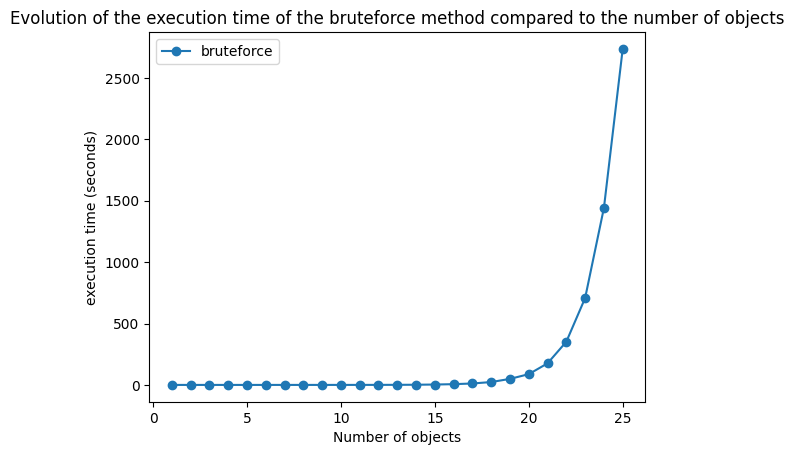

In [3]:
plt.plot(list(range(1, len(executions_time) + 1)), list(map(lambda x: x["bruteforce"], executions_time)), 'o-', label='bruteforce')
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title('Evolution of the execution time of the bruteforce method compared to the number of objects')
plt.show()

We notice that the duration of the bruteforce method evolves in an exponential way.

Graphic representation of the pymoo's method :

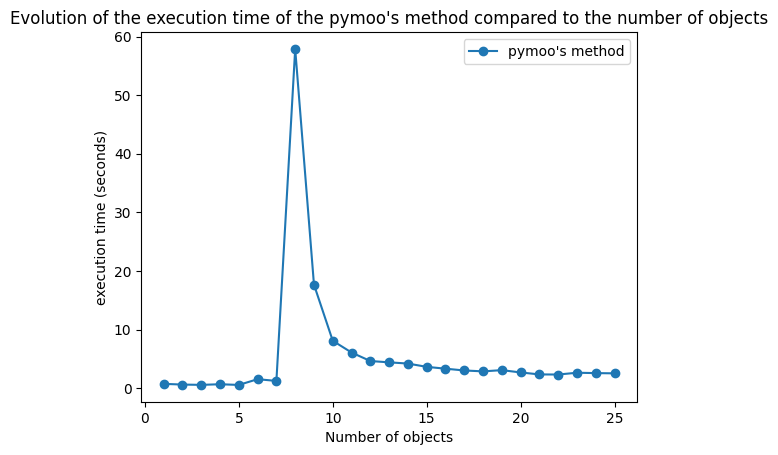

In [4]:
plt.plot(list(range(1, len(executions_time) + 1)), list(map(lambda x: x["pymoo"], executions_time)), 'o-', label="pymoo's method")
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title("Evolution of the execution time of the pymoo's method compared to the number of objects")
plt.show()

It can be noticed that except in some cases, the program always takes more or less the same time to execute.

Graphic representation of the greedy method :

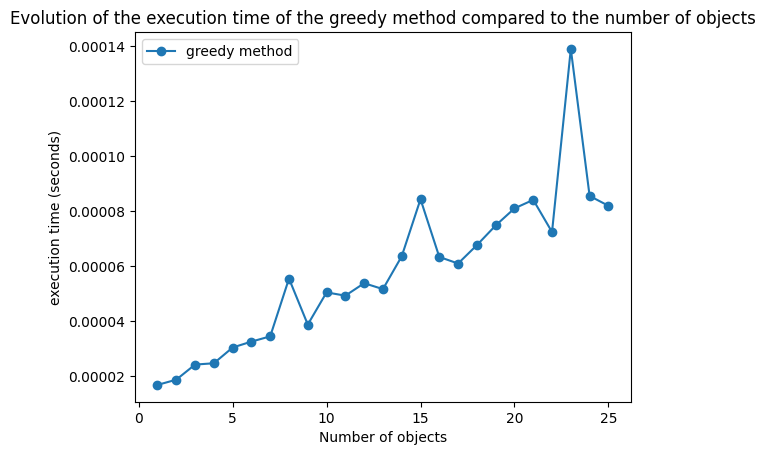

In [5]:
plt.plot(list(range(1, len(executions_time) + 1)), list(map(lambda x: x["greedy"], executions_time)), 'o-', label="greedy method")
plt.legend()
plt.xlabel('Number of objects')
plt.ylabel('execution time (seconds)')
plt.title("Evolution of the execution time of the greedy method compared to the number of objects")
plt.show()

We can then notice that the execution time of the gluttonous method increases with the number of objects.